# Project: Basketball

Author: Minh Bui
<br>
Class: CSCI 3022

Source: https://www.kaggle.com/datasets/ionaskel/nba-games-stats-from-2014-to-2018?resource=download

## The 3 Point Revolution

My multivariate analysis problem involves 3 point shooting in the NBA and how it impacts winning percentage.  This problem is of great interest to me because I love basketball, and I feel that 3 pointers have changed the way the game is played.  The problem is a regression task, as I hope to use 3 point shooting statistics as a predictive measure of wins and losses in the NBA.  I took data from the NBA seasons between 2014-2018 because these years represented the Golden State Warriors dynasty.  The link to my data source is provided above and it details basketball statistics for every NBA team during the designated timeframe.

In [184]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import scipy as sp
import scipy.stats as stats
import math

## Data Cleanup

The original data includes several stats, such as points, rebounds, assists, and more.  But since 3 pointers are the focus of my project, the categories I’m most interested in are wins, 3 pointers made, and 3 pointers attempted.  I cleaned up the data by creating a new dataframe from the win/loss, 3 point makes, and 3 point attempts columns in the original database.  I did this by grouping the data by team name and transforming every win into a 1 and all losses into 0.  By summing up the win/loss column, I got the win total for every team from 2014-2018.  Win rate is calculated as team wins divided by total games played.  Three point percentage equals 3 pointers made divided by 3 point attempts.

In [185]:
nba = pd.read_csv('nba.games.stats.csv')
nba

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,10/29/2014,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,11/1/2014,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,11/5/2014,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,11/7/2014,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,11/8/2014,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,78119,WAS,78,4/3/2018,Away,HOU,L,104,120,38,...,18,27,0.667,10,46,26,13,3,9,14
9836,79119,WAS,79,4/5/2018,Away,CLE,L,115,119,47,...,22,28,0.786,5,35,26,10,3,16,14
9837,80119,WAS,80,4/6/2018,Home,ATL,L,97,103,35,...,16,23,0.696,7,50,24,5,5,18,22
9838,81124,WAS,81,4/10/2018,Home,BOS,W,113,101,41,...,22,27,0.815,13,44,22,14,1,16,18


In [186]:
nba['WinLoss'] = nba['WINorLOSS'].eq('W')
nba['WinLoss'] = nba['WinLoss'].astype(int)

teams = nba.groupby(['Team'])
wins = teams['WinLoss']
wins = wins.sum()
#wins

In [187]:
total = nba['Team'].value_counts()
#total

In [188]:
losses = total - wins
#losses

In [189]:
win_rate = wins / total
#win_rate

In [190]:
made3pt = teams['X3PointShots']
made3pt = made3pt.sum()
#made3pt

In [191]:
att3pt = teams['X3PointShotsAttempted']
att3pt = att3pt.sum()
#att3pt

In [192]:
perc3pt = made3pt / att3pt
#perc3pt

In [193]:
df3pt = pd.DataFrame()

df3pt['Wins'] = wins
df3pt['Losses'] = losses
df3pt['Win Rate'] = win_rate *100
df3pt['3pt Makes'] = made3pt
df3pt['3pt Attempts'] = att3pt
df3pt['3pt Percentage'] = perc3pt *100

df3pt

,Wins,Losses,Win Rate,3pt Makes,3pt Attempts,3pt Percentage
Team,,,,,,
ATL,175,153,53.353659,3279,9159,35.800852
BOS,196,132,59.756098,3301,9397,35.128232
BRK,107,221,32.621951,2990,8656,34.542514
CHI,160,168,48.780488,2825,7959,35.494409
CHO,153,175,46.646341,3019,8556,35.285180
CLE,211,117,64.329268,3754,10096,37.183043
DAL,149,179,45.426829,3383,9585,35.294731
DEN,149,179,45.426829,3126,8876,35.218567
DET,152,176,46.341463,2960,8479,34.909777


## Exploratory Data Analysis

My exploratory data analysis prints graphs of every team’s win/loss record, 3 point makes vs attempts, and 3 point shooting percentage vs winning percentage.  The teams of greatest interest are GSW, CLE, SAS, and HOU.  The Warriors won 3 of the 4 championships during the 2014-2018 timeline, and they did it by shooting a higher 3 point percentage than any other team in the NBA.  Cleveland was the only team to beat Golden State in the NBA Finals, and the Cavaliers had the second highest recorded 3 point shooting rate.  The San Antonio Spurs yielded the second best regular season winning percentage behind Golden State, and the Spurs had the third best 3 point shooting percentage.  Houston was the only team that shot and made more 3 pointers than the Warriors, but their shooting percentage was lower so their win/loss record was inferior.

[Text(0, 0.5, 'Win Loss Record')]

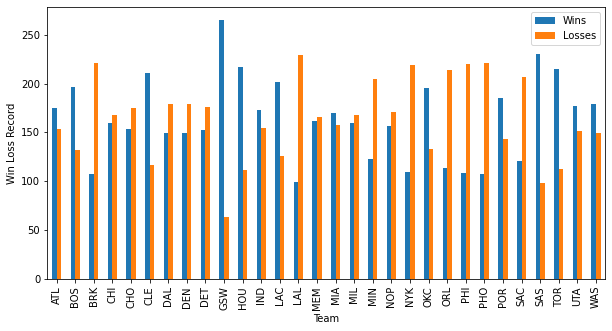

In [194]:
df3pt[['Wins', 'Losses']].plot(kind='bar', figsize=(10, 5)).set(ylabel = 'Win Loss Record')

[Text(0, 0.5, '3 Point Shooting')]

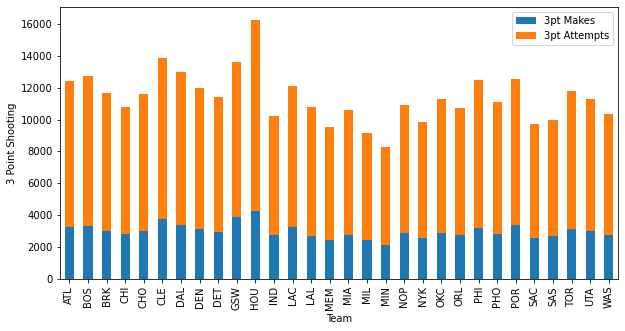

In [195]:
df3pt[['3pt Makes', '3pt Attempts']].plot(kind='bar', stacked=True, figsize=(10, 5)).set(ylabel = '3 Point Shooting')

[Text(0, 0.5, '3 Pointer Winning Percentage')]

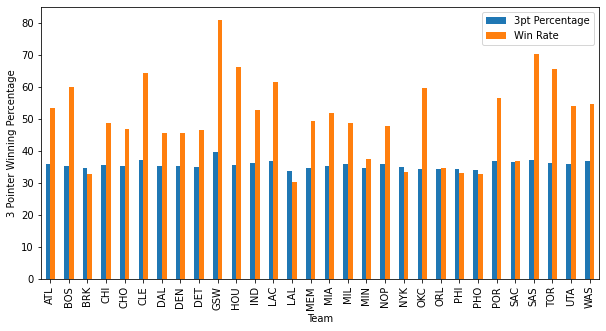

In [196]:
df3pt[['3pt Percentage', 'Win Rate']].plot(kind='bar', figsize=(10, 5)).set(ylabel = '3 Pointer Winning Percentage')